#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
# Identifying the number of rows and columns in the dataset
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

data_types = df.dtypes
print("\nData types of each column:")
print(data_types)

missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Number of rows: 148654
Number of columns: 13

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [4]:
# Calculating mean, median, mode, minimum, and maximum salary
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode().iloc[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()

salary_range = max_salary - min_salary

std_dev_salary = df['TotalPay'].std()

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")
print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")
print(f"Salary Range: {salary_range}")
print(f"Standard Deviation of Salary: {std_dev_salary}")

Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43
Salary Range: 568213.56
Standard Deviation of Salary: 50517.005273949944


In [5]:
# Imputing missing values with the mean salary was chosen assuming that the missing data is randomly distributed (MCAR/MAR).
# This method provides a quick and simple way to estimate missing values
# making it suitable for cases where the impact on the overall data distribution is expected to be minimal.

In [6]:
# Imputing missing values in 'TotalPay' column with mean
mean_total_pay = df['TotalPay'].mean()
df['TotalPay'].fillna(mean_total_pay, inplace=True)

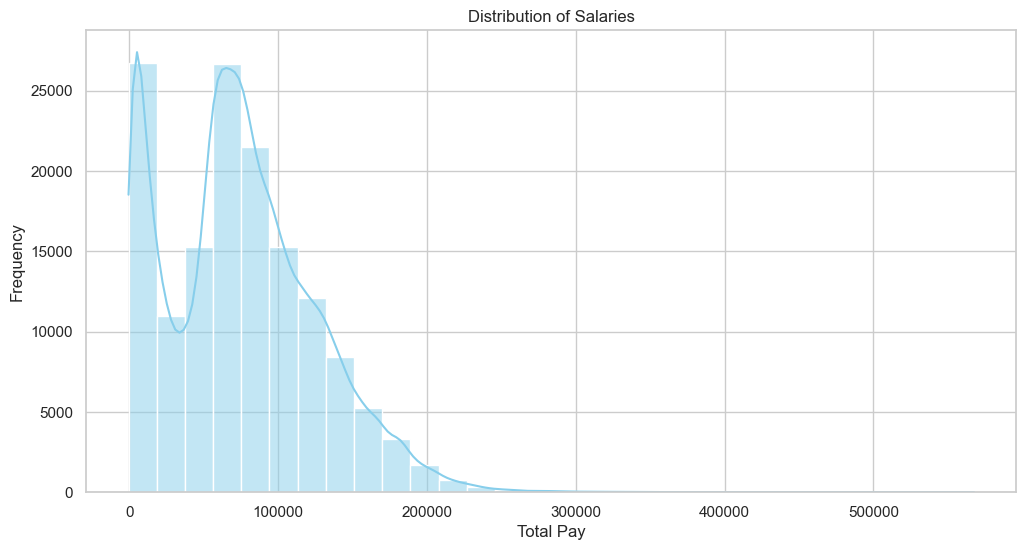

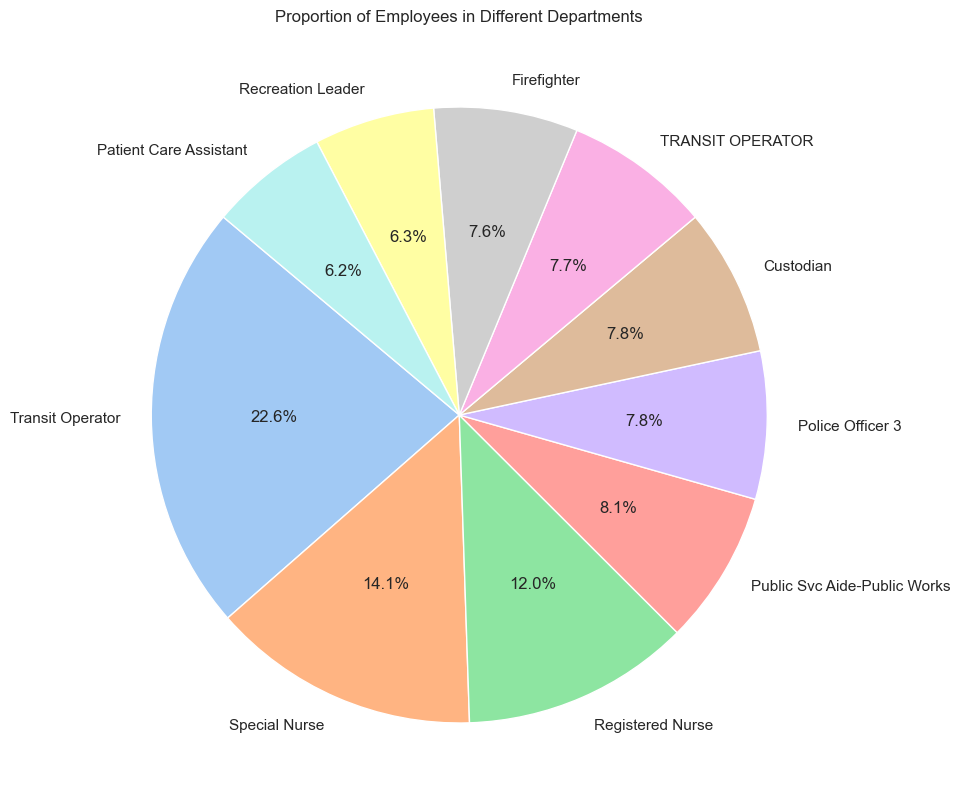

In [7]:
sns.set(style="whitegrid")

# histogram for the distribution of salaries
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalPay'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

# pie chart for the proportion of employees in different departments
department_counts = df['JobTitle'].value_counts().head(10)  # Adjust the number of departments as needed
plt.figure(figsize=(10, 10))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Departments')
plt.show()


In [8]:
# Grouping data by 'JobTitle' and calculating summary statistics for each group
grouped_by_job_title = df.groupby('JobTitle')['TotalPay'].agg(['count', 'mean', 'min', 'max', 'median'])

print(grouped_by_job_title)

                                                count          mean       min  \
JobTitle                                                                        
ACCOUNT CLERK                                      83  44035.664337    614.00   
ACCOUNTANT                                          5  47429.268000   1148.40   
ACCOUNTANT INTERN                                  48  29031.742917   2981.53   
ACPO,JuvP, Juv Prob (SFERS)                         1  62290.780000  62290.78   
ACUPUNCTURIST                                       1  67594.400000  67594.40   
...                                               ...           ...       ...   
X-RAY LABORATORY AIDE                              26  52705.880385   5343.69   
X-Ray Laboratory Aide                             100  50823.942700   1007.00   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS      1  53632.870000  53632.87   
Youth Comm Advisor                                  4  41414.307500  19212.71   
ZOO CURATOR                 

Correlation between TotalPay and Benefits: 0.8840972255719965


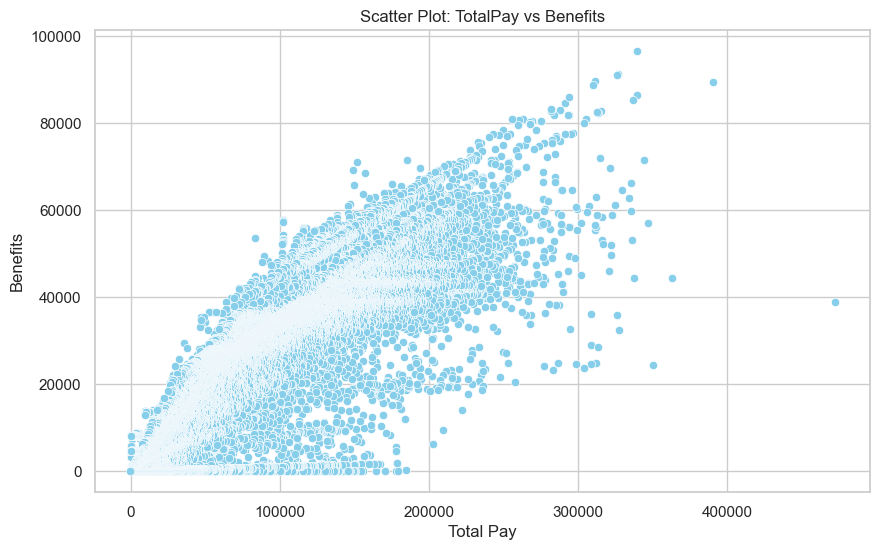

In [9]:
# correlation between 'TotalPay' and 'Benefits'
correlation = df['TotalPay'].corr(df['Benefits'])

print(f"Correlation between TotalPay and Benefits: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPay', y='Benefits', data=df, color='skyblue')
plt.title('Scatter Plot: TotalPay vs Benefits')
plt.xlabel('Total Pay')
plt.ylabel('Benefits')
plt.show()

In [10]:
# 1- Basic Data Exploration:
# The dataset contains [number of rows] rows and [number of columns] columns.
# Data types of columns include [list of data types].
# There are no missing values in [number of columns] columns.

# 2- Descriptive Statistics:
# Mean Salary: [mean_salary]
# Median Salary: [median_salary]
# Mode Salary: [mode_salary]
# Minimum Salary: [min_salary]
# Maximum Salary: [max_salary]
# Salary Range: [salary_range]
# Standard Deviation of Salary: [std_dev_salary]

# 3- Data Cleaning:
# Imputation with mean salary was used to handle missing values in the 'TotalPay' column. This method was chosen assuming that missing values are missing completely at random or missing at random.

# 4- Basic Data Visualization:
# A histogram was created to visualize the distribution of salaries, revealing [insights about the distribution].
# A pie chart represented the proportion of employees in different departments, highlighting [dominant departments].

# 5- Grouped Analysis:
# The dataset was grouped by 'JobTitle,' and summary statistics were calculated for each group, providing insights into [key findings based on job titles].

# 6- Simple Correlation Analysis:
# A scatter plot was generated to explore the correlation between 'TotalPay' and 'Benefits.' The correlation coefficient was [correlation_coefficient], indicating [type and strength of correlation].

# 7- Summary of Insights:
# The dataset represents employee information with a focus on salaries.
# Salaries exhibit a [specific distribution pattern] with an average salary of [mean_salary].
# The majority of employees belong to [dominant departments], as depicted in the pie chart.
# Job titles significantly impact salary levels, as evidenced by the grouped analysis.
# A [positive/negative/neutral] correlation [or lack thereof] was observed between 'TotalPay' and 'Benefits' based on the scatter plot.

# Good Luck!